In [1]:
%load_ext autoreload
%autoreload 2
import constrained as cd
import constrained.constraints as con

In [2]:
@cd.element
def layer(width, title, node_radius=cd.VarPlaceholder(), node_spacing=cd.VarPlaceholder(), hidden=True):
    if hidden:
        fill = "lightgrey"
    else:
        fill = "black"
    nodes = [cd.primitive.Circle(radius=node_radius, style=cd.Style(fill=fill)) for _ in range(width)]
    title_obj =  cd.Text(title)
    return cd.Group(nodes + [title_obj], [
        con.distributed_vertically([title_obj] + nodes, spacing=node_spacing),
        con.aligned_vertically([title_obj] + nodes)
    ])

In [3]:
def connect_layers(layer1, layer2):
    return [cd.Arrow(a.center, b.center) for a in layer1.objects for b in layer2.objects if isinstance(a, cd.Circle) and isinstance(b, cd.Circle)]

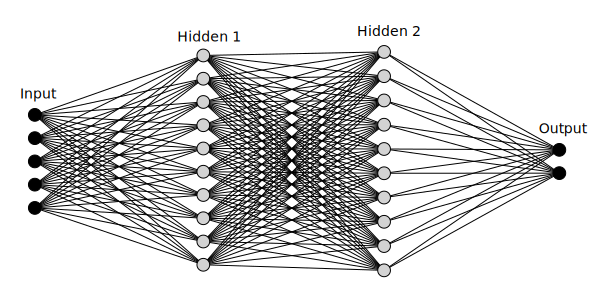

In [13]:
width = 600
height = 300
node_radius = cd.Var()
node_spacing = 10
figure_padding = 20

layers = [
    layer(5, "Input", node_radius, node_spacing, hidden=False), 
    layer(10, "Hidden 1", node_radius, node_spacing), 
    layer(10, "Hidden 2", node_radius, node_spacing), 
    layer(2, "Output", node_radius, node_spacing, hidden=False)
]

content = cd.Group(connect_layers(layers[0], layers[1]) + connect_layers(layers[1], layers[2]) + connect_layers(layers[2], layers[3]) + layers, [
    con.aligned_horizontally(layers),
    con.distributed_horizontally(layers)
])

bg = cd.Rect(top_left=(0, 0), width=width, height=height, style=cd.Style(fill="white", outline=None))
canvas = cd.Canvas(width, height, cd.Group([bg, content], [con.inset(content, bg, figure_padding, figure_padding)]))

cd.solve(canvas, solver="gd")

In [47]:
from constrained.diff.diffsolver import _constraint_to_loss
from constrained import ast

a = ast.Var()
b = ast.Var()

constraints = [
    ast.Min(-1.0, [a, b]),
    ast.Max(1.0, [a, b])
]
loss = sum([_constraint_to_loss(constraint) for constraint in constraints])

for _ in range(100):
    loss.forward()
    loss.backward()
    loss.step(0.1)
    print(b._autograd_var.value)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
